In [ ]:
[texto del enlace](https://)<a href="https://colab.research.google.com/github/pabloudea/AstroPosicion/blob/main/AstroPos_PS1_1152205385.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
import numpy as np

arccos,arcsin,arctan = np.arccos,np.arcsin,np.arctan
cos,sin,tan,pi = np.cos,np.sin,np.tan,np.round(np.pi,6)

El objetivo es crear un código para estimar la superficie (área) de Suramérica, aproximando su forma a un triángulo esférico haciendo uso de la trigonometría esférica.
Para ello, primero escogemos tres puntos $A(ϕ_{A},λ_{A})$, $B(ϕ_{B},λ_{B})$, y $C(ϕ_{C},λ_{C})$ sobre dicha región, los cuales seran los vertices del triangulo a resolver. Escribimos sus coordenadas geodesicas.

Además, introducimos el semieje mayor $a_{WGS84}$, del elipsoide de revolución que representa la Tierra, su achatamiento $f$ y su excentricidad $e$.

In [ ]:
#Coordenadas geodésicas de los puntos seleccionados
A,B,C=[14.1713889,-75.19111],[4.024722, -34.571944],[-56.969444,-70.658611]

#Parámetros del WGS84
aWGS,f,e = 6.378137e3,1/298.257223563,np.sqrt(6.69437999e-3)

En la imagen a continuación se muestra el triángulo escogido. 

Para resolverlo, se debe calcular los lados $a$, $b$ y $c$, para lo cual se toman los puntos $A$, $B$, y $C$ de a dos y se resuelven los $3$ triángulos esféricos resultantes, esto es, los triángulos $\triangle AP_{s}B$ para hallar el cateto $c$, $\triangle CP_{s}B$ para hallar el cateto $a$ y $\triangle AP_{s}C$ para hallar el cateto $b$, donde $P_{s}$ es el Polo Sur terrestre.

Usando los teoremas de la trigonometría esférica, se tiene que:

$$
\Theta_{3} = \arccos[\cos(90°-\phi_{P_{1}})\cos(90°-\phi_{P_{2}}) + \sin(90°-\phi_{P_{1}})\sin(90°-\phi_{P_{2}})\cos(\theta)]
$$

donde $\Theta_{3}$ es el cateto que une a $P_{1}$ con $P_{2}$ (medido en $°$ o $rad$) y $\theta$ es el ángulo opuesto a dicho cateto.


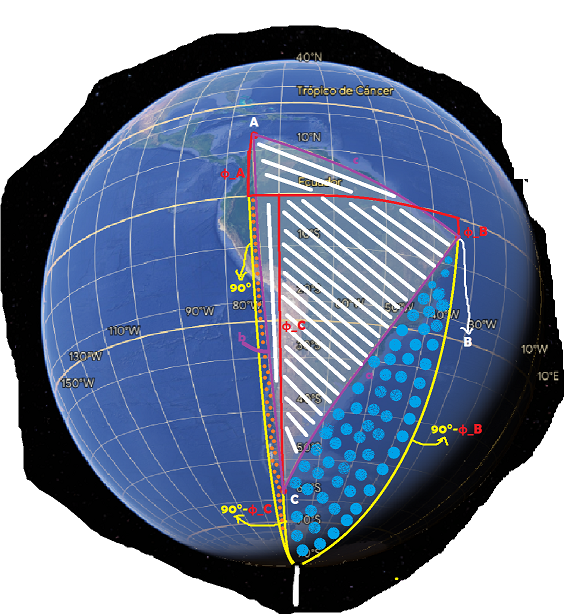

Para hallar las coordenadas geocéntricas $\phi_{geoc}$, $\lambda_{geoc}$ y $\rho_{geoc}$ de dichos puntos, se tiene que:


$$ λ_{geoc}= λ$$


$$\phi_{geoc}= \tan^{-1}[(1-f)^2\tan(\phi)]$$


$$\rho=a_{WGS84}\sqrt{\frac{1-e^2(2-e^2)\sin^2{\phi}}{1-e^2\sin^2{\phi}}}$$

Para saber cual es el punto más cercano al centro de la Tierra, se utiliza la función $np.min(\rho_{A},\rho_{B},\rho_{C})$

La distancia promedio se calcula usando la función $np.mean(\rho_{A},\rho_{B},\rho_{C})$

Para calcular el área y el perímetro del triángulo esférico determinado por los puntos $A(ϕ_{A},λ_{A})$, $B(ϕ_{B},λ_{B})$, y $C(ϕ_{C},λ_{C})$ se asume que cada cateto es el arco de una circunferencia máxima de radio $R_{T}=6371$ $km$.

Asumiendo esto, se tiene que la medida del cateto $i$, en $km$ sería:

$$s_{i} = R_{T}\Theta_{i}$$

por lo que el perímetro sería $$P=a+b+c$$

y el área se puede calcular usando la fórmula:

$$ A = \left \{ \begin{matrix} \frac{\epsilon  \pi}{180°}*R^{2} & \mbox{si }\epsilon \mbox{ está en °} \\ \epsilon * R^{2} & \mbox{si }\epsilon \mbox{ está en radianes}\end{matrix}\right 
]$$ donde $\epsilon$ es el **exceso esférico**, el cual está definido como:

$$ \epsilon= \alpha + \beta + \gamma - \pi 
$$ 
$$\angle{\hat{BAC}} = \alpha $$ $$ \angle{\hat{ABC}} = \beta $$ $$ \angle{\hat{ACB}} = \gamma$$


In [ ]:
def Tri_esferico(A,B,C,R=6.371e3 ):
    """
    Parámetros:
    A, B, C deben ser listas que contengan las coordenadas geodésicas de cada punto: A = [latA,longA]
    Las coordenadas deben estar dadas en grados sexagesimales (°)
    R es el radio de la esfera. Por defecto se toma el valor del radio terrestre en Km.
    Devuelve un diccionario donde:
    Coordenadas geocentricas un arreglo con un mensaje dando las coordenadas geocentricas de cada punto.
    Distancia Mínima es la distancia mínima al centro de la Tierra entre los tres puntos
    Distancia Promedio es la distancia promedio al centro de la Tierra entre los tres puntos
    lados contiene un arreglo de NumPy con las medidas de los tres lados del triángulo esférico, dadas en km.
    angulos contiene un arreglo de NumPy con las medidas de los tres ángulos del triángulo esférico, dadas en radianes.
    exceso es el exceso esférico, perimetro medido en km y area en km^2"""
    
    #Función para encontrar las coordenadas geocéntricas de los puntos ingresados
    def geocentricas(lat_,lon_,e2=6.69437999e-3,a_=6.378137e3):
      lon_gc=lon_*180/pi
      lat_gc=arctan(tan(lat_)*(1-e2))*180/pi
      d_rad = a_*np.sqrt(1-e2*(2-e2)*sin(lat_))
      geoc = np.array([lat_gc,lon_gc,d_rad])
      return geoc
    
    #Cálculos de los lados s, los ángulos ang, el exceso eps, el perímetro P y el área A
    
    #Conversión de grados a radianes.             
    lat = list(np.array([i[0] for i in (A,B,C)])*round(pi/180,5))
    lon = list(np.array([i[1] for i in (A,B,C)])*round(pi/180,5))

    #Cálculo de coordenadas geocéntricas.
    geo = np.array([geocentricas(lat_,lon_) for (lat_,lon_) in zip(lat,lon)])
    rta =["Las coordenadas geocéntricas del punto {0} son lat={1:.5f} y distancia radial rho={2:.5f}\n".format([A,B,C][i],geo[i,0],geo[i,2]) for i in range(len(geo))]
    #Distancia de cada punto al centro de la Tierra
    dist = np.array(geo)[:,2]
    #Distancia mínima al centro de la Tierra e índice de dicho punto en la lista [A,B,C]
    cercano, ind = np.min(dist), np.argmin(dist)
    msg_min = "El punto más cercano al centro de la Tierra es {0} a una distancia de {1:.2f} km".format([A,B,C][ind],cercano)
    #Distancia promedio al centro de la Tierra
    d_prom = np.mean(dist)
    msg_mean ="La distancia promedio al centro de la Tierra es de {0:.2f} km".format(d_prom)
    
    #Calcular los lados a,b,c del triángulo esférico
    s = [ arccos( sin(lat[i])*sin(lat[j]) + cos(lat[i])*cos(lat[j])*cos( abs(lon[j]-lon[i]) ) ) for i in (0,len(A)) for j in (1,len(A)) if i!=j ]
    #Calcular los ángulos del triángulo esférico
    ang = [ arccos( ( cos(s[i])-cos(s[j])*cos(s[k]) ) / ( sin(s[j])*sin(s[k]) ) ) for i in range(0,len(s)) for j in range(0,len(s)) for k in range(0,len(s)) if i!=j and i!=k and j!=k and j<k]
    #Calcular exceso esférico del triángulo
    eps = np.array(ang).sum()-pi
    #Calcular el perímetro del triángulo esférico
    P = np.array(s).sum()*R
    #Cálculo del área del triángulo esférico definido por los puntos A, B y C
    A = eps*(R**2)
    #Creación del diccionario 
    dicc = {"Coordenadas geocentricas": rta,"Distancia Mínima":msg_min,"Distancia Promedio":msg_mean,
            "lados [Km]":list(np.array(s).round(5)*R), "angulos [°]":np.array(ang).round(5)*180/pi, "exceso [°]":round(eps,5)*180/pi,
            "perimetro [Km]":round(P,5), "Área [Km^2]": round(A,5)
            }
    return dicc


In [ ]:
triangulo = Tri_esferico(A,B,C)
A_SAmer, A_calc = 17.84E6, triangulo["Área [Km^2]"]

e_tot, e_rel = (A_calc - A_SAmer).round(3), (A_calc - A_SAmer)/A_SAmer
msg_error = "El error total en el área calculada es de {0} Km^2.\nEl error relativo es de {1:.2f}%".format(e_tot,e_rel*100)
print(msg_error)

El error total en el área calculada es de 1909997.468 Km^2.
El error relativo es de 10.71%
